In [205]:
!pip install --upgrade pingouin

     |████████████████████████████████| 205 kB 954 kB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204286 sha256=ad26685c7b0b929a9fc6a0b5156605d42c23fc44dfdd79fe0804d6fbabc6bbbe
  Stored in directory: /Users/leosilva/Library/Caches/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
Successfully built pingouin
  Attempting uninstall: pingouin
    Found existing installation: pingouin 0.3.11
    Uninstalling pingouin-0.3.11:
      Successfully uninstalled pingouin-0.3.11


In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
from PIL import Image
import pingouin as pg
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import jarque_bera

In [207]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [208]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')

In [209]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count', 'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity", 'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [210]:
def create_line_plot(tweets, id_user, count):
    fig, ax = plt.subplots(figsize=(30, 12))

    tweets["created_at"] = pd.to_datetime(tweets["created_at"])
    tweets['date_minus_time'] = tweets["created_at"].apply(lambda tweets : datetime.datetime(year=tweets.year, month=tweets.month, day=tweets.day))
    tweets.set_index(tweets["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(tweets['final_score'].resample('D').mean())

    x = new_df.index
    y = new_df['final_score']

    ran = range(0, len(x), 15)

    x_ticks = new_df.index[ran]

    plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=18)
    plt.xticks(x_ticks, rotation='vertical', fontsize=18)

    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel('Polarity Score', fontsize=16)

    plt.title("Tweets polarity per day - Participant {} - User {}".format(count, id_user), fontsize=30, pad = 20)
    plt.ylabel("Polarity", fontsize=26, labelpad = 10)
    plt.xlabel("Days", fontsize=26, labelpad = 10)

    # plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    # min_ylim, max_ylim = plt.ylim()
    # plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.margins(x=0.02)
    plt.tight_layout()
    plt.plot(x,y)

In [211]:
count = 1
all_tweets = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_pd(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang',
                             "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                            "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                            "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                            "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                            'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        tweets['Participant'] = count
        if all_tweets.empty:
            all_tweets = tweets
        else:
            all_tweets = all_tweets.append(tweets)
        
        count += 1
    
# print(all_tweets)
# sns.relplot(x="created_at", y="final_score", hue="final_polarity", row="id_user",
#             kind="line", data=all_tweets);

In [212]:
tweets = create_tweets_pd(data, 26)
columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang', "id_user",
                     "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                    "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                    "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                    "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                    'text_updated', 'is_retweet', 'retweet_updated']

for c in columns_to_delete:
    del tweets[c]
    
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba
url,None,https://t.co/gX4oRZWHg3,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng,https://t.co/YJQuDtv2YW,https://t.co/3yZ94QNQvs,https://t.co/MtUeSEBICu,https://t.co/QU71LJgSuD,None,https://t.co/AmkOKWlftK,https://t.co/JWBzdmQOcV,https://t.co/yPuEuh1bn9,https://t.co/Uhw9rEUK2v,None,None,https://t.co/9cS34v6hKc,https://t.co/H7Mzn0CEHR,https://t.co/bf6AeBboQk


In [213]:
all_tweets

,created_at,id_user,final_score,final_polarity,Participant
0,2021-03-31T19:13:28,26,-0.114700,neg,1
1,2021-03-31T12:28:56,26,0.000000,neu,1
2,2021-03-31T12:17:06,26,0.308058,pos,1
3,2021-03-31T11:46:04,26,-0.103292,neg,1
4,2021-03-30T17:58:24,26,-0.232700,neg,1
...,...,...,...,...,...
2693,2019-07-18T12:25:38,42,-0.062500,neg,14
2694,2019-07-14T22:31:40,42,0.204550,pos,14
2695,2019-07-17T18:58:07,42,-0.132075,neg,14
2696,2019-07-18T12:26:04,42,0.033050,pos,14


In [214]:
def create_boxplot_chart_data(is_percent):
    bar_chart_data = []

    count = 1
    for i in data:
        if data[i]['bigfive']:
            tweets = create_tweets_pd(data, i)
            columns_to_delete = ['id', 'id_str_twitter', "text", 'created_at', 'favorite_count', 'retweet_count', 'lang', "id_user",
                             "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                            "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                            "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                            "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                            'text_updated', 'is_retweet', 'retweet_updated']

            for c in columns_to_delete:
                del tweets[c]

            if is_percent == True:
                d = ['P{}'.format(count),
                     (len(tweets.query("final_polarity == 'pos'")) / len(tweets)) * 100,
                     (len(tweets.query("final_polarity == 'neu'")) / len(tweets)) * 100,
                     (len(tweets.query("final_polarity == 'neg'")) / len(tweets)) * 100
                    ]
            else:
                d = ['P{}'.format(count), len(tweets.query("final_polarity == 'pos'")),
                     len(tweets.query("final_polarity == 'neu'")), 
                     len(tweets.query("final_polarity == 'neg'"))]
            bar_chart_data.append(d)
            count += 1

    if is_percent == True:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
    else:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
    return df

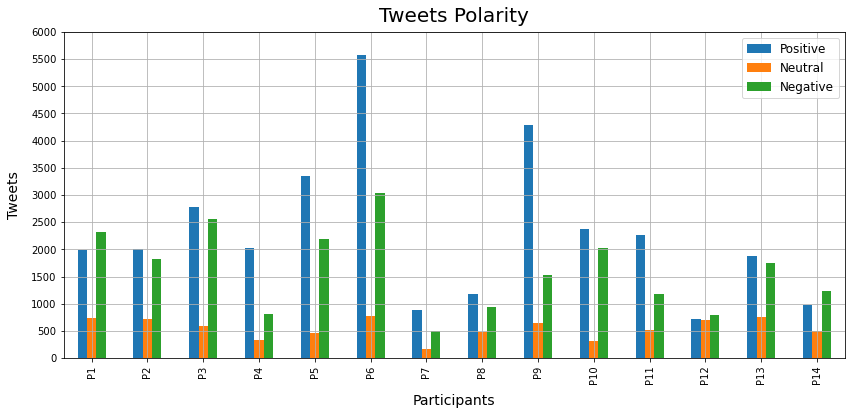

In [265]:
# multiple bar plots

df = create_boxplot_chart_data(False)
# df.head()
y_range = range(0,6001, 500)
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,6))

plt.legend(["Positive", "Neutral", "Negative"], fontsize=12)
plt.title('Tweets Polarity', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('Tweets', fontsize=14, labelpad=10)
plt.grid(True)

plt.show()

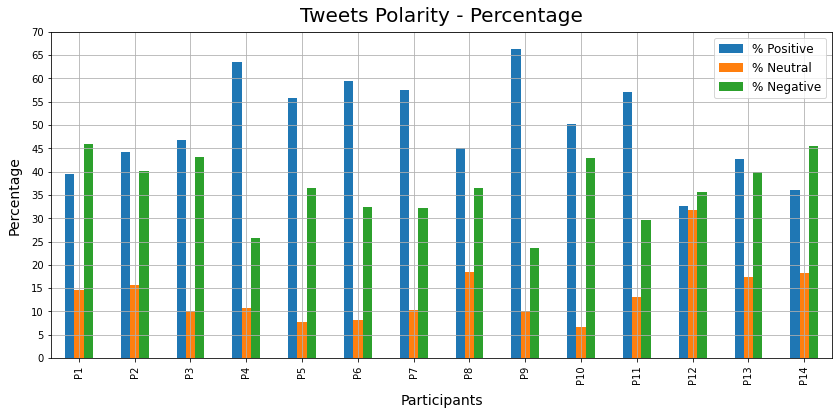

In [266]:
# multiple line plots

df = create_boxplot_chart_data(True)

y_range = range(0, 71, 5)
# df.head()
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,6))


plt.legend(['% Positive', '% Neutral', '% Negative'], fontsize=12)
plt.title('Tweets Polarity - Percentage', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('Percentage', fontsize=14, labelpad=10)
plt.grid(True)

plt.show()

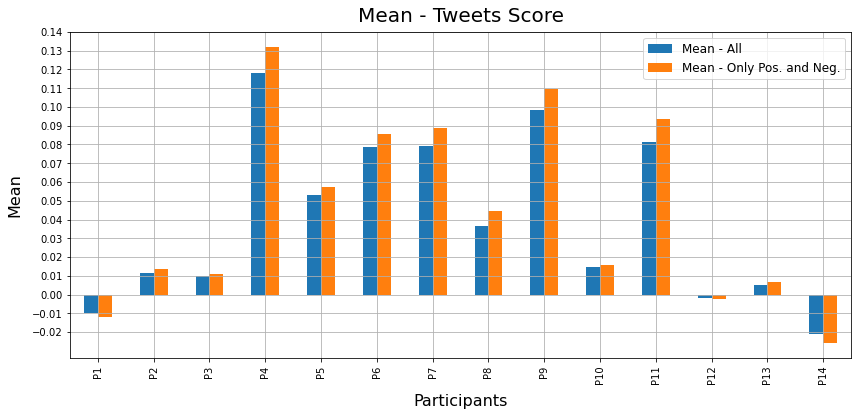

In [217]:
# multiple bar plots with means

bar_chart_data = []

y_range = np.arange(-0.02, 0.15, 0.01) 

count = 1
for i in data:
    if data[i]['bigfive']:
        tweets = create_tweets_pd(data, i)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'created_at', 'favorite_count', 'retweet_count', 'lang', "id_user",
                         "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                        "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                        "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                        "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                        'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]    

        d = ['P{}'.format(count), 
             tweets['final_score'].mean(),
             tweets.query("final_polarity != 'neu'")['final_score'].mean()
            ]

        bar_chart_data.append(d)
        count += 1

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(yticks = y_range, x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,6))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."], fontsize=12)
plt.title('Mean - Tweets Score', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=16, labelpad=10)
plt.ylabel('Mean', fontsize=16, labelpad=10)
plt.grid(True)

plt.show()

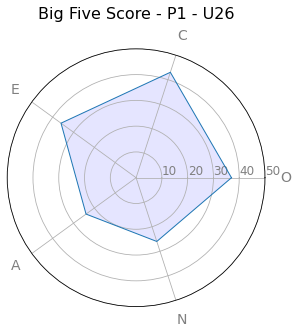

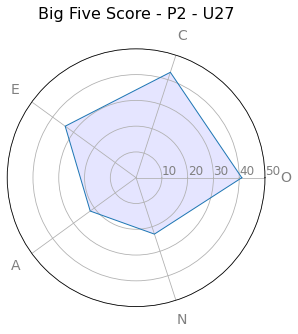

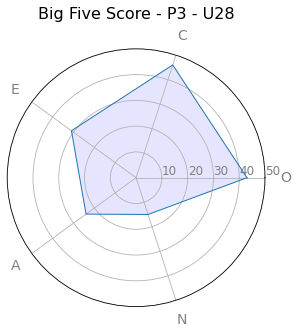

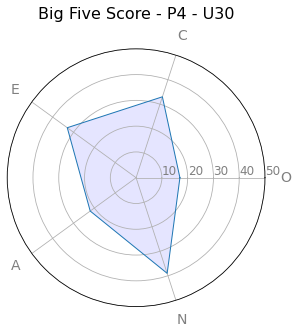

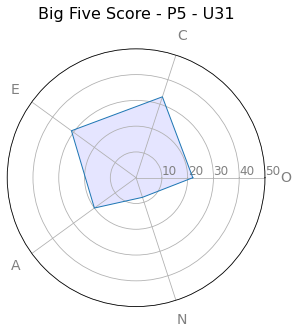

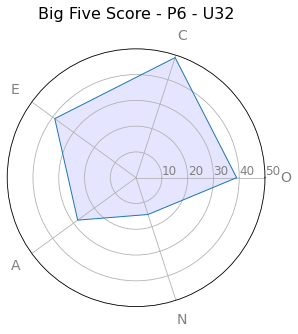

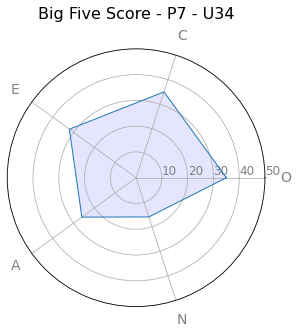

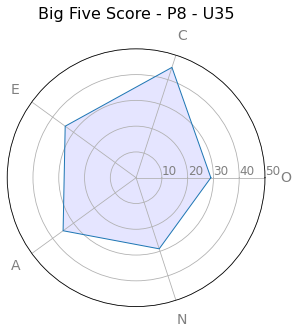

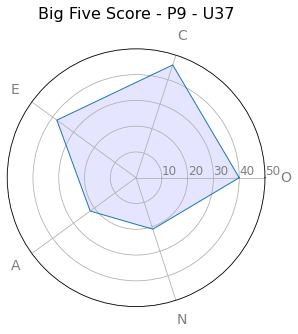

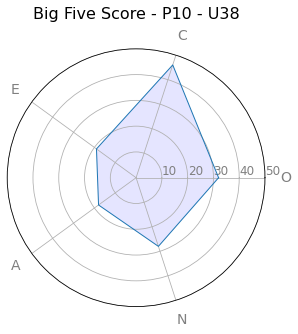

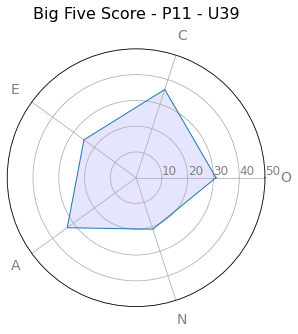

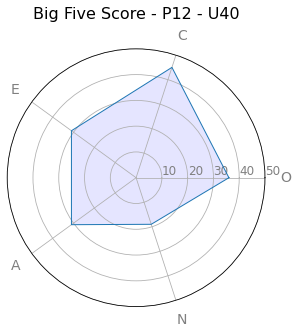

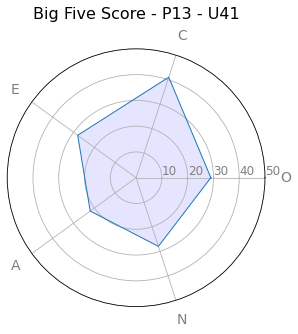

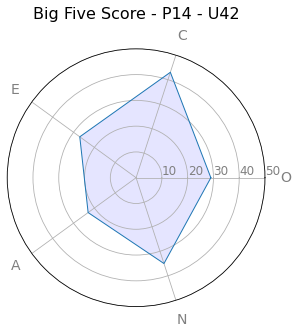

In [218]:
count = 1

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'id_user']
        o = b['O']
        c = b['C']
        e = b['E']
        a = b['A']
        n = b['N']
        
        df = pd.DataFrame({
        'group': ['A'],
        'O': o,
        'C': c,
        'E': e,
        'A': a,
        'N': n
        })
        
        # number of variable
        categories=list(df)[1:]
        N = len(categories)

        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values=df.loc[0].drop('group').values.flatten().tolist()
        values += values[:1]

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]


        fig = plt.figure(figsize=(8, 6))
        gs = GridSpec(nrows=1, ncols=2)

        # Initialise the spider plot
        ax = fig.add_subplot(gs[0, 0])
        ax = plt.subplot(121, polar=True)

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=14)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=12)
        plt.ylim(0,50)
        
        ax.tick_params(pad=10)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

        plt.title('Big Five Score - P{} - U{}'.format(count, d), fontsize=16, pad = 30)

        plt.tight_layout()

#         Show the graph
        plt.show()
        
#         fig.savefig('images/polar_ocean_p{}_u{}.png'.format(count, d), bbox_inches='tight')

        count += 1

In [275]:
count = 1
bf = pd.DataFrame(columns = ['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N'])
for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'Id User']
        b['Participant'] = count
        del b['id']
        b = b[['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N']]
        bf = bf.append(b)
        count += 1
        
bf

,Participant,Id User,O,C,E,A,N
0,1,26,37,43,36,24,26
0,2,27,41,43,34,22,23
0,3,28,43,46,31,24,15
0,4,30,17,33,33,22,39
0,5,31,22,33,31,20,8
0,6,32,39,49,39,28,15
0,7,34,35,35,32,26,16
0,8,35,29,45,34,35,29
0,9,37,40,46,38,22,21
0,10,38,32,46,19,18,28


[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

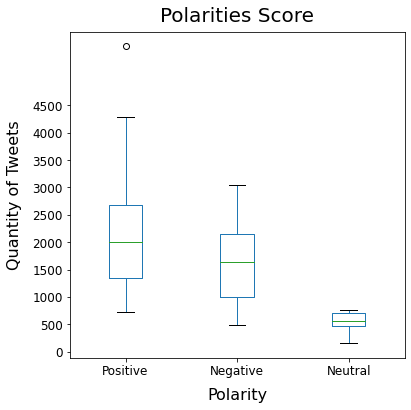

In [219]:
df = create_boxplot_chart_data(False)

bplot = df.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(6,6))
y_range = range(0,4501, 500)

bplot.axes.set_title("Polarities Score", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

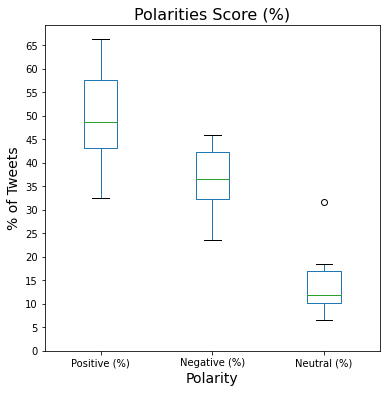

In [220]:
df = create_boxplot_chart_data(True)

bplot = df.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(6,6))
y_range = range(0, 70, 5)

bplot.axes.set_title("Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("% of Tweets", fontsize=14)
bplot.set_yticks(y_range)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

In [221]:
def create_line_plot(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]

    tickvalues = range(0,len(x))

    fig = plt.figure(figsize=(14,3.5))

    plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

    plt.title("Quantity Tweets per Month - P{} - U{}".format(count, id_user))
    plt.ylabel("Quantity of Tweets", fontsize=12)
    plt.xlabel("Months", fontsize=12)

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [222]:
def create_histogram(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]
    
    fig = plt.figure(figsize=(15,3.5))

    n, bins, patches = plt.hist(y, bins='auto', color='#5643fd')

    plt.xticks(np.arange(0, 1000, 50))

    plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))

    plt.title('Tweets Frequency per Month - P{} - U{}'.format(count, id_user))
    plt.xlabel('Quantity of Tweets')
    plt.ylabel('Frequency')

    plt.show()

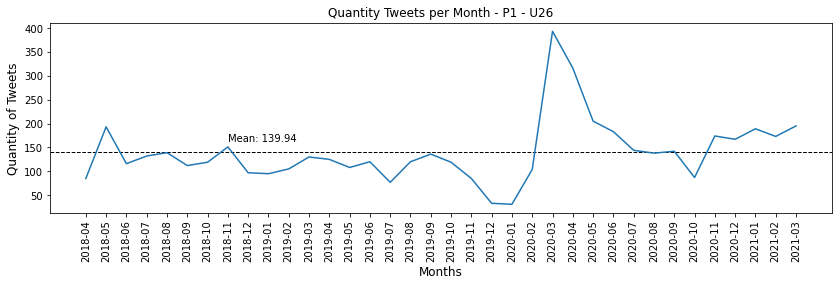

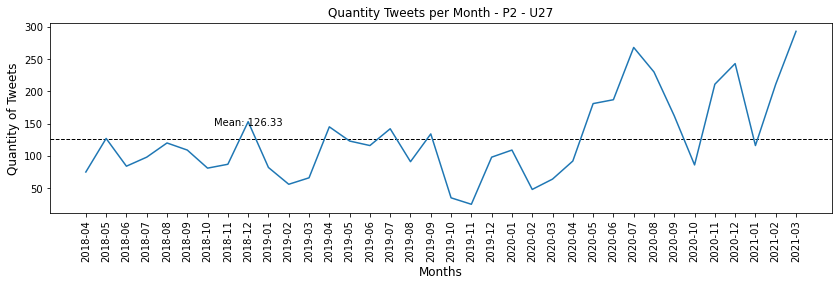

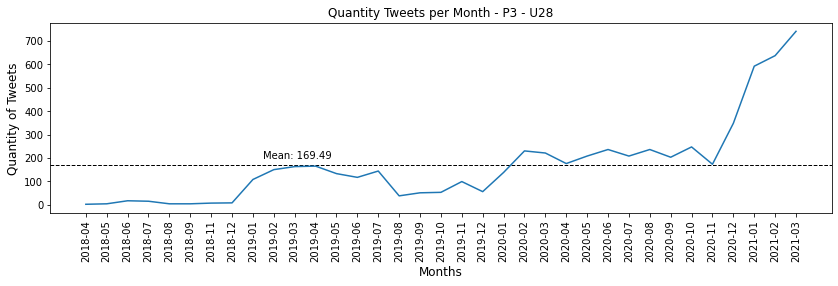

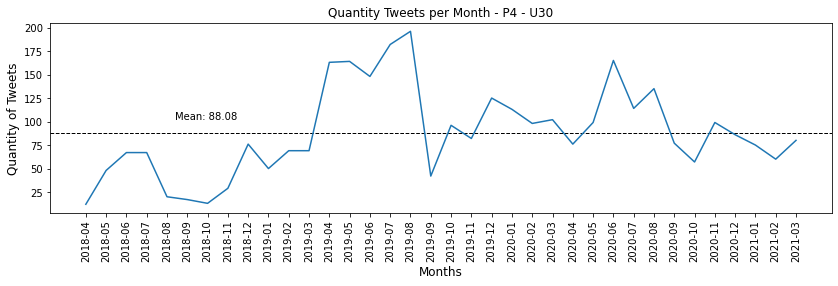

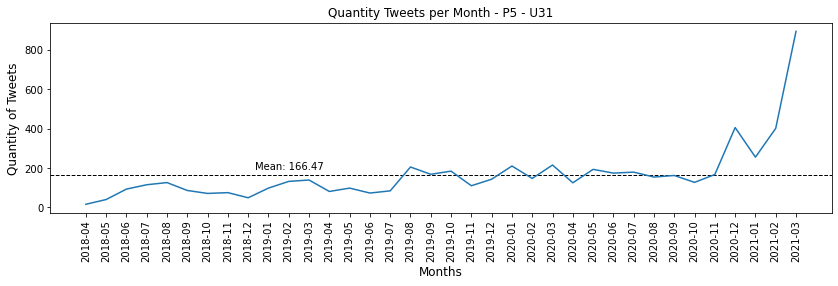

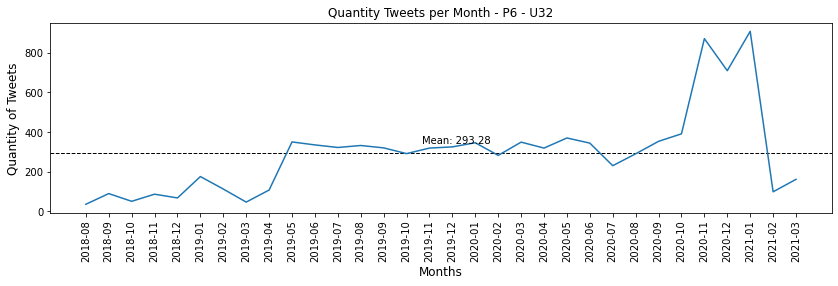

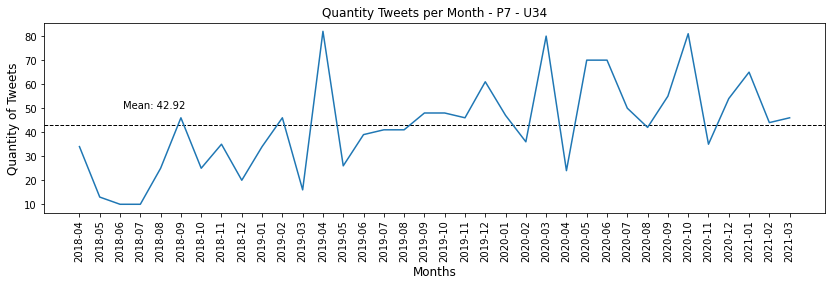

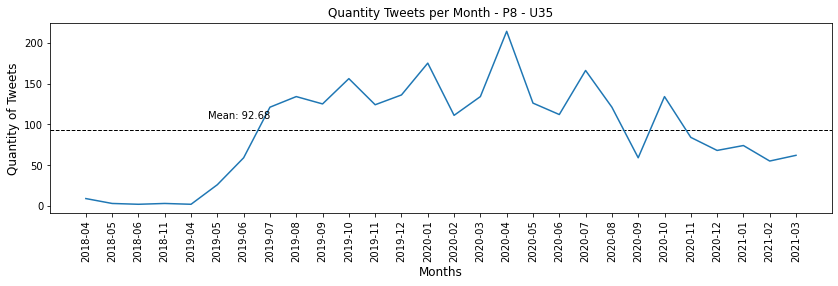

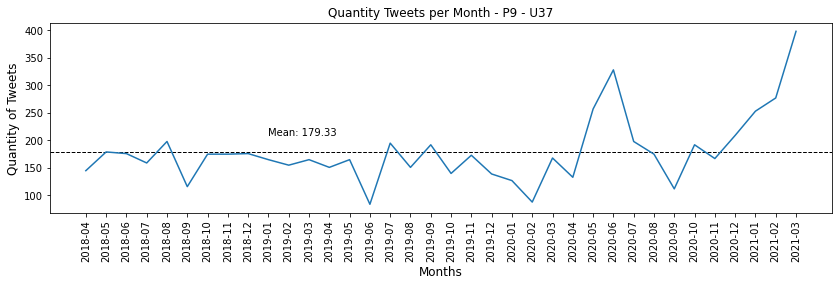

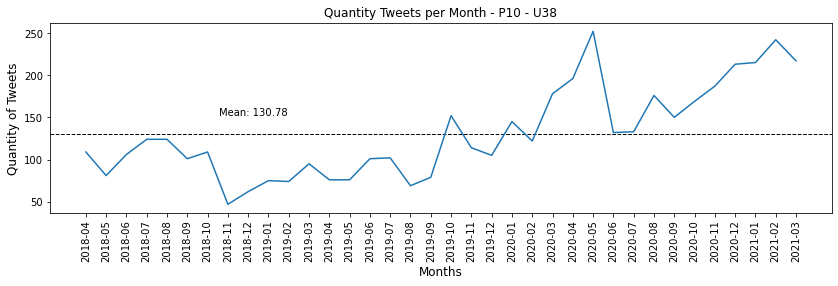

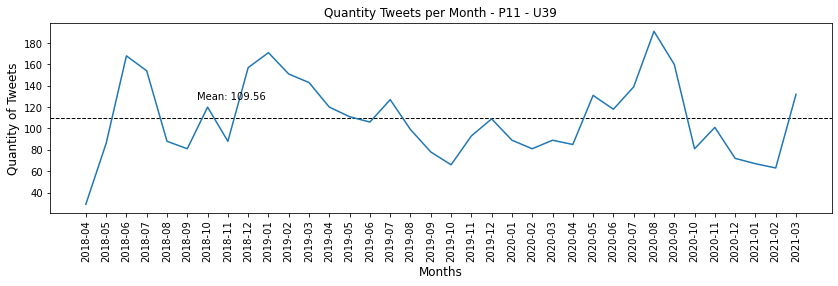

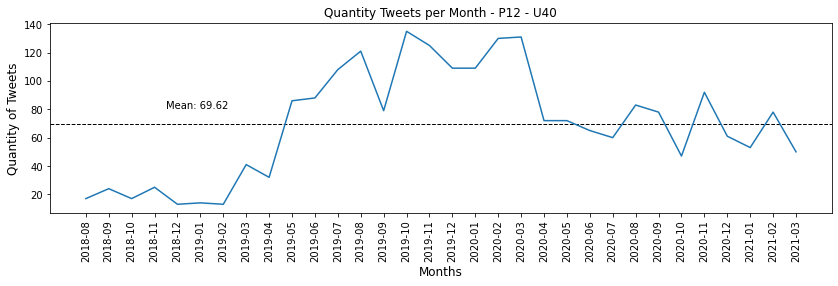

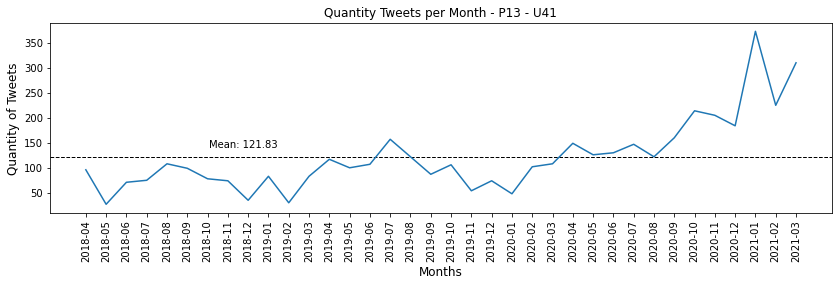

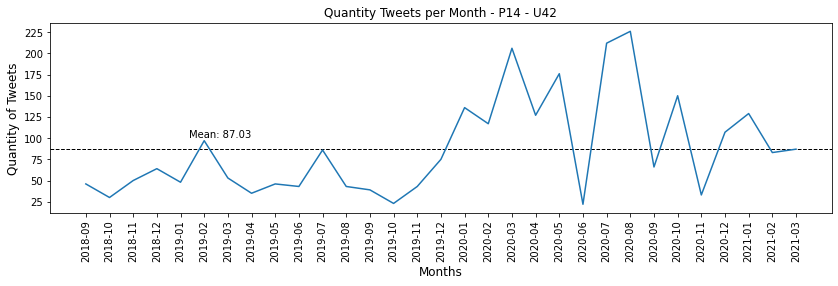

In [223]:
count = 1
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)

        tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
        tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

        df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

        df_result = pd.DataFrame(df["text"])
        df_result["YearMonth"] = list(df_result.index)

        create_line_plot(df_result, id_user, count)
#         create_histogram(df_result, id_user, count)
        count += 1

In [224]:
def totalize_data_by_month():
    df_result_all = {}
    all_df = []

    for c in data:
        id_user = c
        if data[id_user]['bigfive']:
            tweets_pd = create_tweets_pd(data, id_user)
            tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
            tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

            df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

            df_result = pd.DataFrame(df["text"])
            df_result["YearMonth"] = list(df_result.index)
            df_result_all = dict.fromkeys(list(df_result.index), 0)
            all_df.append(df_result)

    for d in df_result_all:
        for a in all_df:
            temp_df = a.loc[a['YearMonth']== d]
            if len(temp_df['text']) > 0:
                df_result_all[d] = df_result_all[d] + temp_df['text'][0]

    df_res = pd.DataFrame.from_records([df_result_all])
    df_res = df_res.transpose()
    return df_res

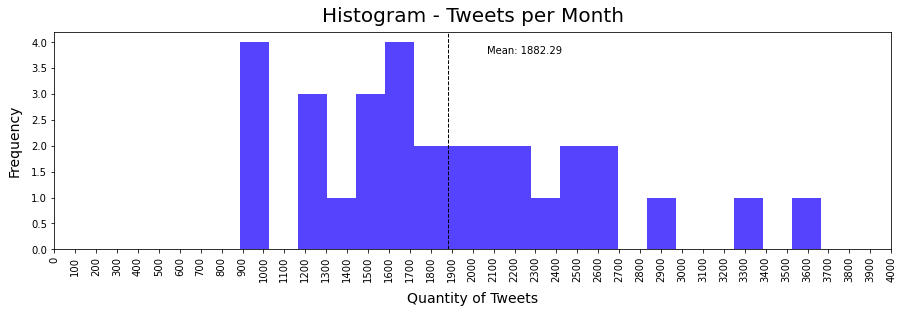

In [225]:
# HISTOGRAM OF TOTAL TWEETS, GROUPED BY MONTH

df = totalize_data_by_month()

fig = plt.figure(figsize=(15,4))

n, bins, patches = plt.hist(df, bins=20, color='#5643fd')

plt.xticks(np.arange(0, 4001, 100), rotation = 'vertical')

plt.axvline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.title('Histogram - Tweets per Month', fontsize=20, pad=10)
plt.xlabel('Quantity of Tweets', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)

plt.show()

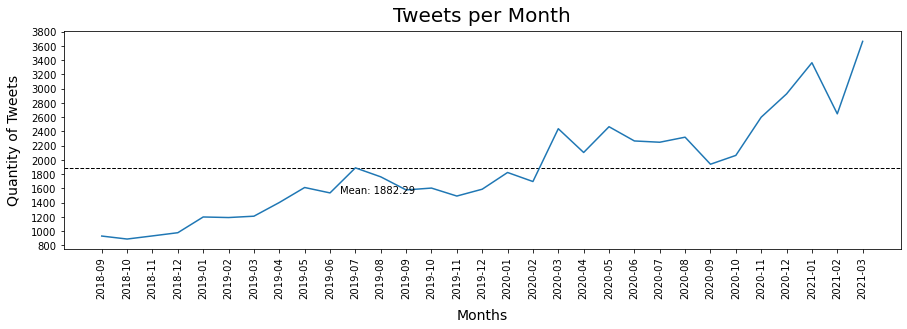

In [226]:
tickvalues = range(0,len(df.index))

fig = plt.figure(figsize=(15,4))

plt.xticks(ticks = tickvalues ,labels = df.index, rotation = 'vertical')
plt.yticks(np.arange(0, 5000, 200))

plt.title("Tweets per Month", fontsize=20, pad=10)
plt.ylabel("Quantity of Tweets", fontsize=14, labelpad=10)
plt.xlabel("Months", fontsize=14, labelpad=10)

plt.axhline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*0.005, max_ylim*0.32, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.plot(df)

In [227]:
all_tweets

,created_at,id_user,final_score,final_polarity,Participant
0,2021-03-31T19:13:28,26,-0.114700,neg,1
1,2021-03-31T12:28:56,26,0.000000,neu,1
2,2021-03-31T12:17:06,26,0.308058,pos,1
3,2021-03-31T11:46:04,26,-0.103292,neg,1
4,2021-03-30T17:58:24,26,-0.232700,neg,1
...,...,...,...,...,...
2693,2019-07-18T12:25:38,42,-0.062500,neg,14
2694,2019-07-14T22:31:40,42,0.204550,pos,14
2695,2019-07-17T18:58:07,42,-0.132075,neg,14
2696,2019-07-18T12:26:04,42,0.033050,pos,14


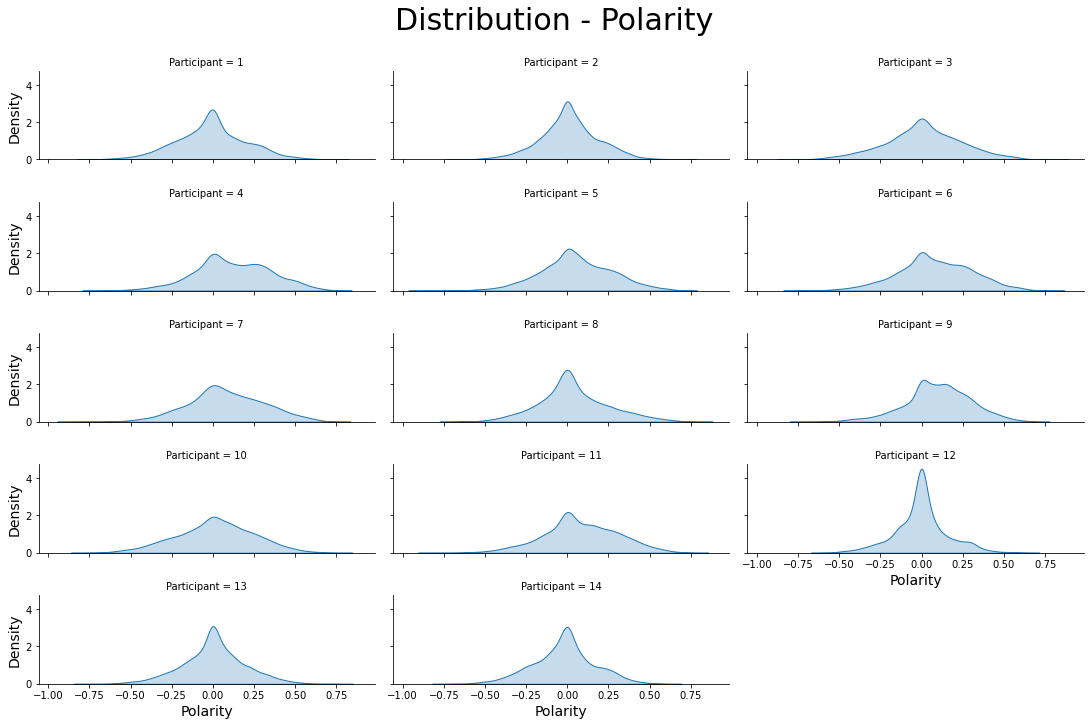

In [228]:
g = sns.FacetGrid(all_tweets, col="Participant", col_wrap=3)
g.fig.set_size_inches(15,10)
g.fig.suptitle('Distribution - Polarity', fontsize=30, y=1)
g.map(sns.kdeplot, "final_score", fill=True, palette="crest")
g.set_axis_labels("Polarity", 'Density', fontsize=14)

xl = ''
yl = ''

for ax in g.axes:
    xlabel = ax.xaxis.get_label_text()
    if xlabel:
        xl = xlabel
    ylabel = ax.yaxis.get_label_text()
    if ylabel:
        yl = ylabel

        
for ax in g.axes:
    xlabel = ax.xaxis.get_label_text()
    if not xlabel:
        ax.xaxis.set_label_text(xl)
    ylabel = ax.yaxis.get_label_text()
    if not ylabel:
        ax.yaxis.set_label_text(yl)
        

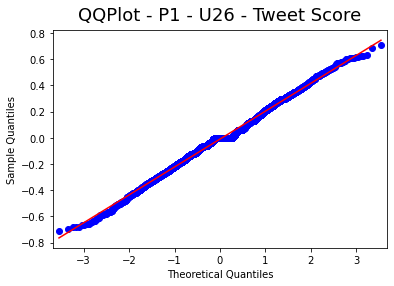

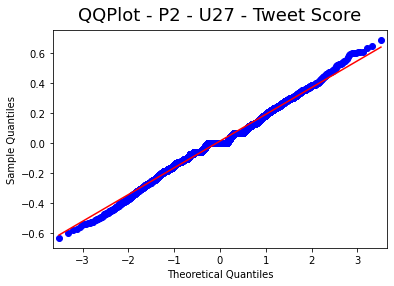

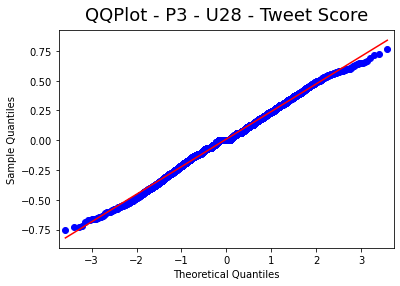

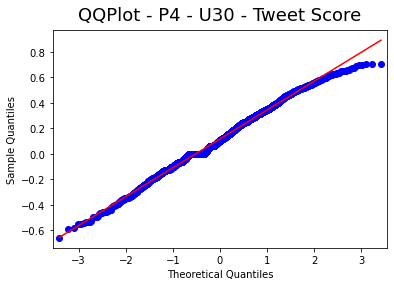

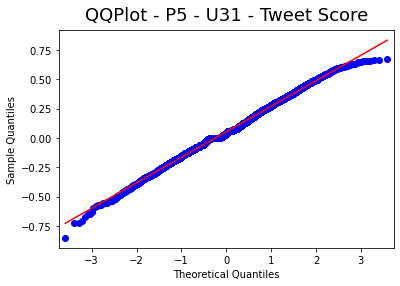

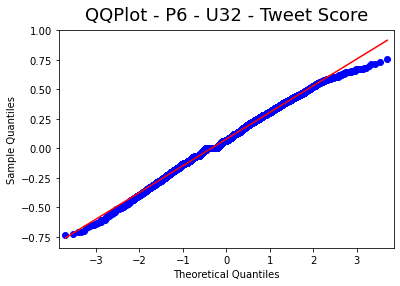

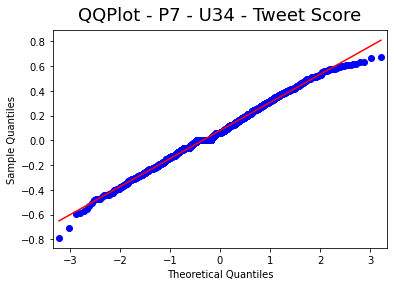

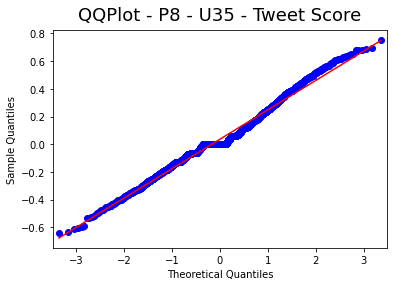

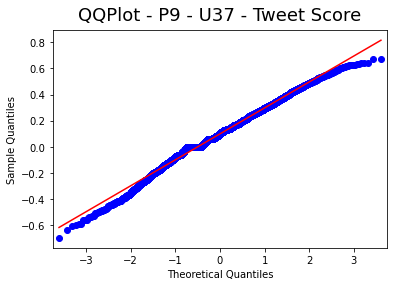

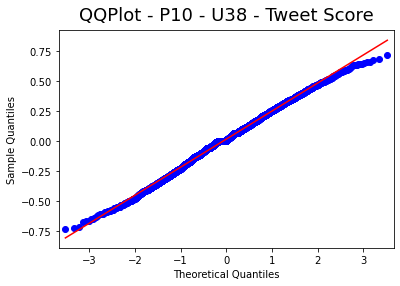

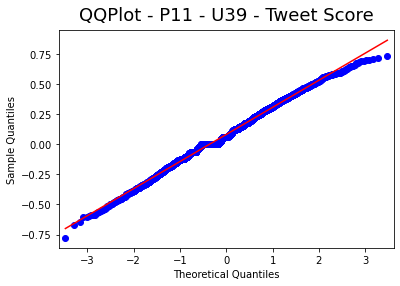

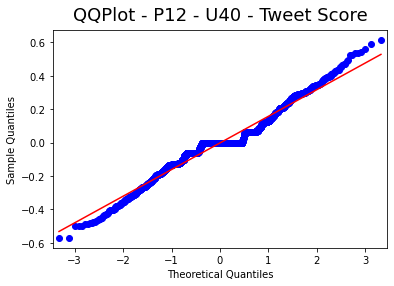

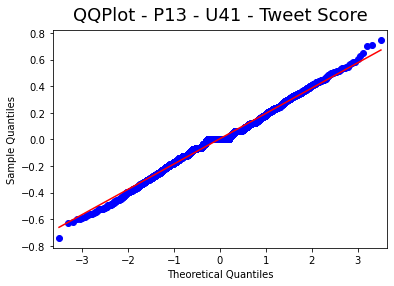

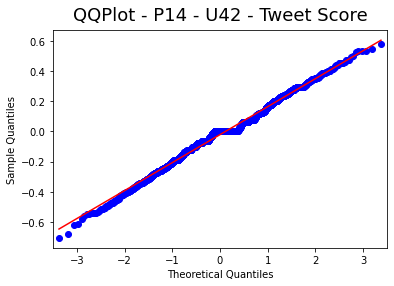

In [229]:
count = 1
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)
        fig = qqplot(tweets_pd['final_score'], line='s')
        plt.title("QQPlot - P{} - U{} - Tweet Score".format(count, id_user), fontsize=18, pad=10)
        count += 1
        


In [230]:
bar_chart_data

[['P1', -0.00996752618499402, -0.011672802631334233],
 ['P2', 0.011344290622251552, 0.013467458561733245],
 ['P3', 0.009870767768037766, 0.010977389276340463],
 ['P4', 0.11799876781456964, 0.13207698296505482],
 ['P5', 0.05304767950558983, 0.05753071720539266],
 ['P6', 0.07853089563931835, 0.08554990778583897],
 ['P7', 0.07942946106796114, 0.08854149880952379],
 ['P8', 0.036478940077071365, 0.04471556424185177],
 ['P9', 0.09860962952447339, 0.1096492883585946],
 ['P10', 0.01495653911427359, 0.01602170333333335],
 ['P11', 0.08113262401115626, 0.09339961152948052],
 ['P12', -0.0017613999326750438, -0.0025784487844940853],
 ['P13', 0.005346729195166437, 0.0064691735862068955],
 ['P14', -0.021138664177168195, -0.025888386722650834]]

In [231]:
all_tweets

,created_at,id_user,final_score,final_polarity,Participant
0,2021-03-31T19:13:28,26,-0.114700,neg,1
1,2021-03-31T12:28:56,26,0.000000,neu,1
2,2021-03-31T12:17:06,26,0.308058,pos,1
3,2021-03-31T11:46:04,26,-0.103292,neg,1
4,2021-03-30T17:58:24,26,-0.232700,neg,1
...,...,...,...,...,...
2693,2019-07-18T12:25:38,42,-0.062500,neg,14
2694,2019-07-14T22:31:40,42,0.204550,pos,14
2695,2019-07-17T18:58:07,42,-0.132075,neg,14
2696,2019-07-18T12:26:04,42,0.033050,pos,14


In [232]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : [],
            'O': [],
            'C': [],
            'E': [],
            'A': [],
            'N': []
          }

for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)
        vader_df = tweets_pd[['id_user', 'final_score', 'final_polarity']].copy()
        qtd_pos = vader_df.query('final_polarity == "pos"')['id_user'].count()
        qtd_neu = vader_df.query('final_polarity == "neu"')['id_user'].count()
        qtd_neg = vader_df.query('final_polarity == "neg"')['id_user'].count()
        qtd_total = vader_df['final_polarity'].count()
        df_dict['id_user'].append(id_user)
        df_dict['pos'].append(qtd_pos)
        df_dict['neu'].append(qtd_neu)
        df_dict['neg'].append(qtd_neg)
        df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
        df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
        df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
        df_dict['mean'].append(vader_df['final_score'].mean())
        for b in data[id_user]['bigfive']:
            df_dict['O'].append(b[1])
            df_dict['C'].append(b[2])
            df_dict['E'].append(b[3])
            df_dict['A'].append(b[4])
            df_dict['N'].append(b[5])

df_chart = pd.DataFrame(df_dict)
df_chart

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N
0,26,1991,736,2311,39.519651,14.608972,45.871378,-0.009968,37,43,36,24,26
1,27,2009,717,1822,44.173263,15.765172,40.061566,0.011344,41,43,34,22,23
2,28,2774,598,2560,46.763318,10.080917,43.155765,0.009871,43,46,31,24,15
3,30,2016,338,817,63.576159,10.659098,25.764743,0.117999,17,33,33,22,39
4,31,3342,467,2184,55.765059,7.792424,36.442516,0.053048,22,33,31,20,8
5,32,5575,770,3040,59.403303,8.204582,32.392115,0.078531,39,49,39,28,15
6,34,890,159,496,57.605178,10.291262,32.103560,0.079429,35,35,32,26,16
7,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,29,45,34,35,29
8,37,4284,650,1522,66.356877,10.068154,23.574969,0.098610,40,46,38,22,21
9,38,2369,313,2026,50.318607,6.648258,43.033135,0.014957,32,46,19,18,28


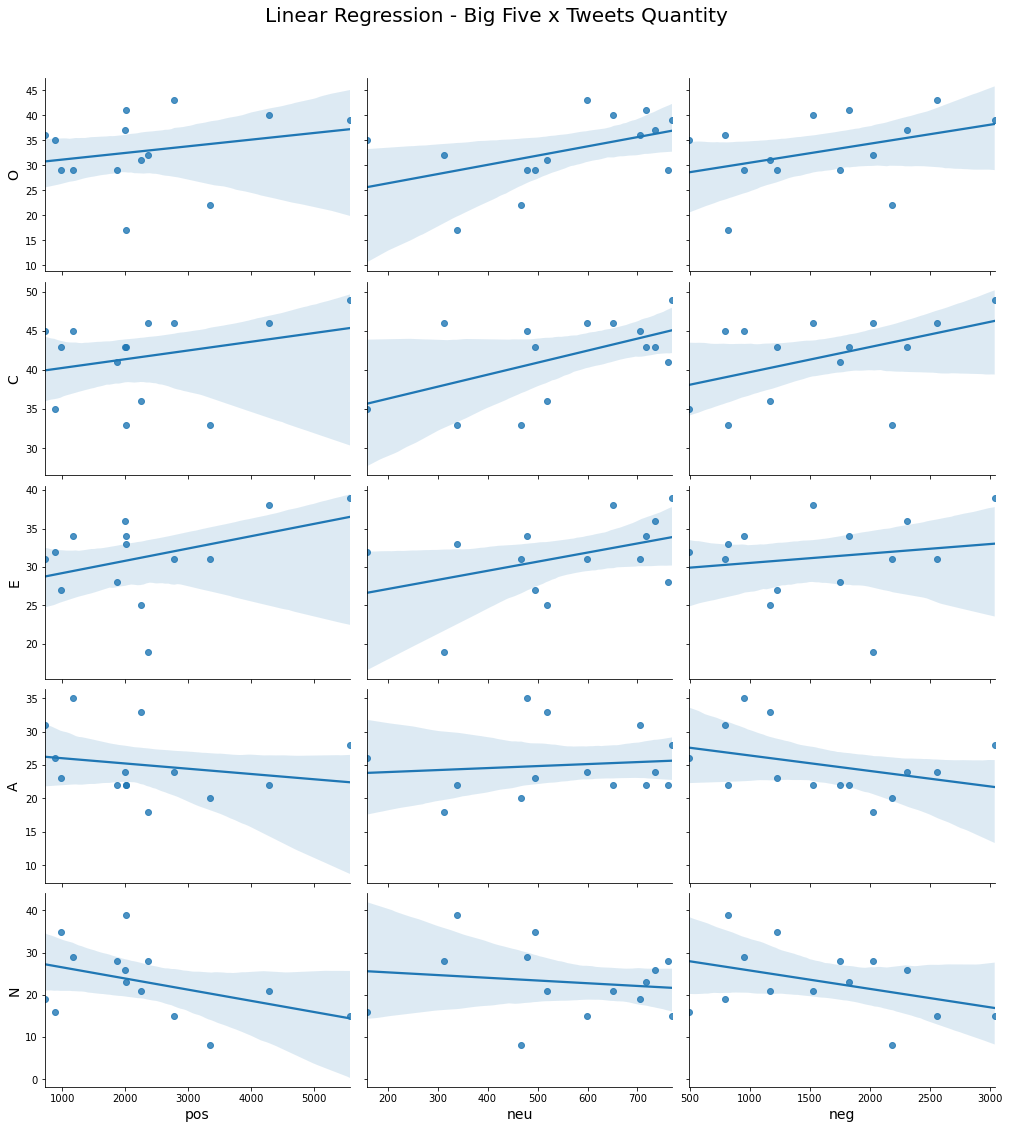

In [233]:
g = sns.pairplot(data=df_chart, x_vars=['pos', 'neu', 'neg'], y_vars=['O','C','E','A','N'], kind='reg')
g.fig.set_size_inches(15,15)
g.fig.suptitle('Linear Regression - Big Five x Tweets Quantity', fontsize=20, y=1.05)

for ax in g.axes:
    for a in ax:
        a.set_ylabel(a.get_ylabel(), fontsize=14)
        a.set_xlabel(a.get_xlabel(), fontsize=14)

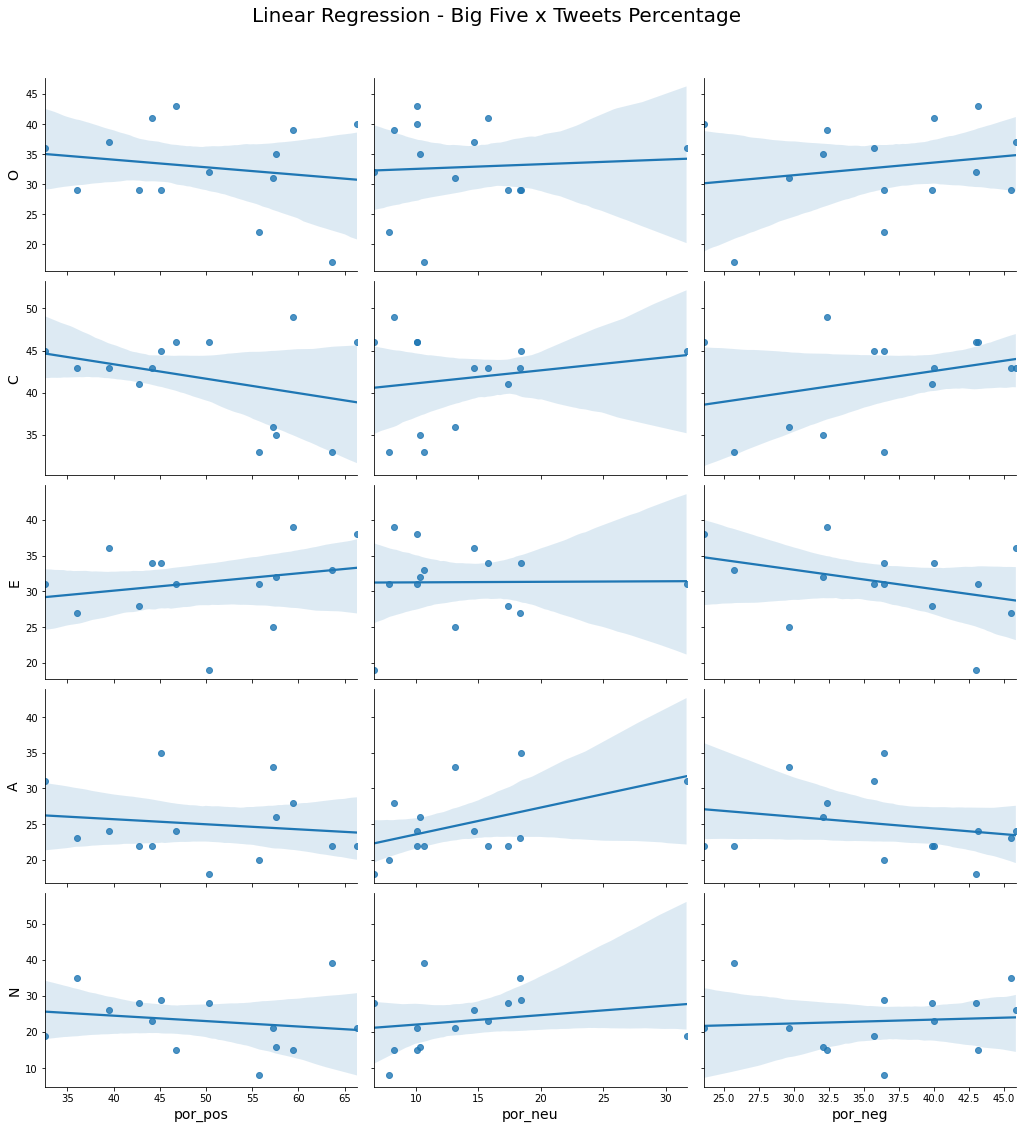

In [234]:
g = sns.pairplot(data=df_chart, x_vars=['por_pos', 'por_neu', 'por_neg'], y_vars=['O','C','E','A','N'], kind='reg')
g.fig.set_size_inches(15,15)
g.fig.suptitle('Linear Regression - Big Five x Tweets Percentage', fontsize=20, y=1.05)

for ax in g.axes:
    for a in ax:
        a.set_ylabel(a.get_ylabel(), fontsize=14)
        a.set_xlabel(a.get_xlabel(), fontsize=14)

In [235]:
count = 1
all_df = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)
        df = pd.DataFrame(tweets_pd)
        del df['text']
        del df['vader_sentiment_analysis_score']
        del df['vader_sentiment_analysis_polarity']
        del df['oplexicon_sentiment_analysis_score']
        del df['oplexicon_sentiment_analysis_polarity']
        del df['sentistrength_sentiment_analysis_score']
        del df['sentistrength_sentiment_analysis_polarity']
        del df['sentilexpt_sentiment_analysis_score']
        del df['sentilexpt_sentiment_analysis_polarity']

        df = df.sort_values(by='created_at')

        df["created_at"] = pd.to_datetime(df["created_at"])
        df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
        df.set_index(df["date_minus_time"],inplace=True)

        df_pos = df.query("final_polarity == 'pos'")
        df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
    #     df_pos['polarity'] = ["pos" for i in df_pos['final_score']]


        df_neg = df.query("final_polarity == 'neg'")
        df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())
    #     df_pos['polarity'] = ["neg" for i in df_neg['final_score']]

        df_final = df_pos.append(df_neg)
        df_final = df_final.fillna(0)
    #     df_final.columns = ['final_score_pos', 'final_score_neg']

    #     df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
        df_final['id_user'] = id_user
        df_final['date'] = df_final.index
        df_final = df_final.reset_index(drop=True)

        df_final.sort_values(by=['date'])
        df_final['Participant'] = count

        if all_df.empty:
            all_df = df_final
        else:
            all_df = all_df.append(df_final)

    #     plot_point_chart_pos_neg(df_final, count, id_user)


        count += 1
    

all_df['pol'] = np.where(all_df['final_score'] > 0, 'pos', np.where(all_df['final_score'] < 0, 'neg', 'neu'))
all_df

,final_score,id_user,date,Participant,pol
0,0.172350,26,2018-04-02,1,pos
1,0.000000,26,2018-04-03,1,neu
2,0.247928,26,2018-04-04,1,pos
3,0.042875,26,2018-04-05,1,pos
4,0.256600,26,2018-04-06,1,pos
...,...,...,...,...,...
1853,0.000000,42,2021-03-27,14,neu
1854,0.000000,42,2021-03-28,14,neu
1855,-0.145250,42,2021-03-29,14,neg
1856,0.000000,42,2021-03-30,14,neu


In [236]:
mean_df = all_df.groupby(['Participant', 'id_user', 'date'], as_index=False)['final_score'].mean()
mean_df['pol'] = 'mean'
mean_df = mean_df[['final_score','id_user','date','Participant','pol']]
mean_df

,final_score,id_user,date,Participant,pol
0,0.079725,26,2018-04-02,1,mean
1,-0.132175,26,2018-04-03,1,mean
2,0.012346,26,2018-04-04,1,mean
3,0.021437,26,2018-04-05,1,mean
4,0.089608,26,2018-04-06,1,mean
...,...,...,...,...,...
14838,0.000000,42,2021-03-27,14,mean
14839,0.000000,42,2021-03-28,14,mean
14840,-0.069663,42,2021-03-29,14,mean
14841,0.105000,42,2021-03-30,14,mean


In [237]:
# all_df = all_df.append(mean_df)
# all_df

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


[None, None]

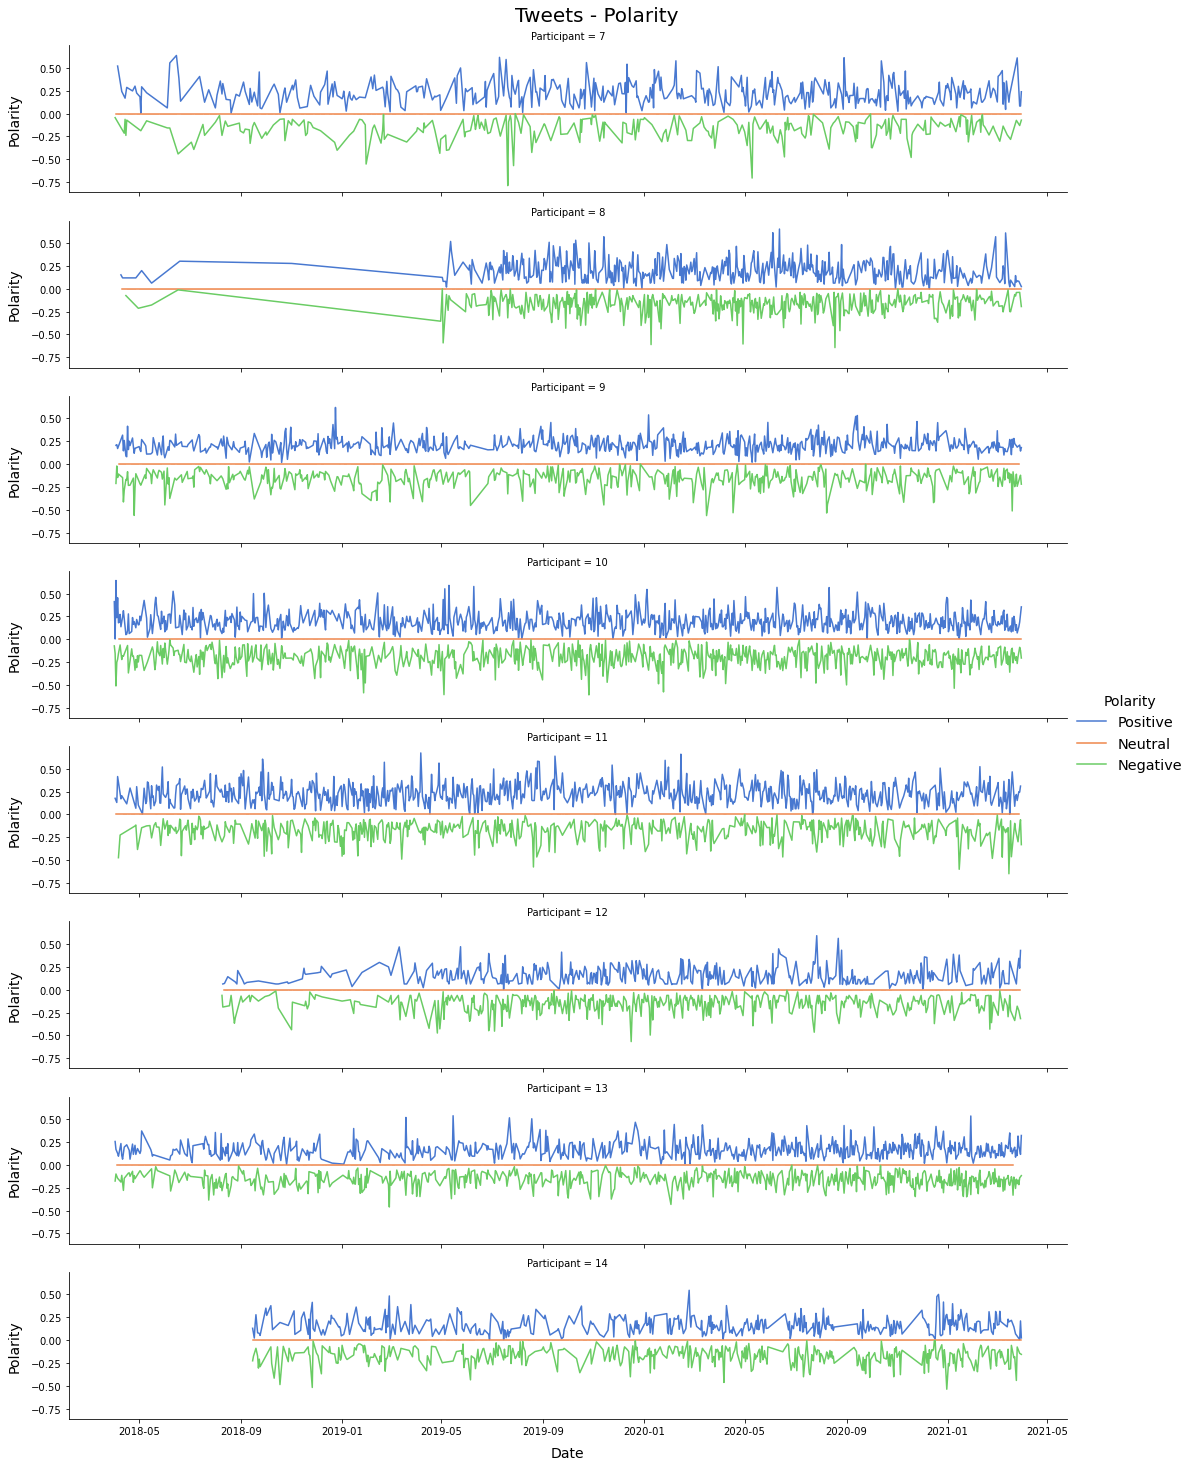

In [238]:
g = sns.FacetGrid(all_df.query('Participant > 6'), row="Participant", hue='pol', legend_out=True, palette="muted")
g.fig.set_size_inches(15,20)
g.map(sns.lineplot, 'date', "final_score")

g.fig.suptitle('Tweets - Polarity', fontsize=20, y=1.01)
g.set_axis_labels("Date", 'Polarity', fontsize=14)
        
for ax in g.axes:
    for a in ax:
        a.set_ylabel("Polarity", fontsize=14, labelpad=10)
        a.set_xlabel("Date", fontsize=14, labelpad=10)
        
g.add_legend(fontsize='x-large', title="Polarity", labels=['Positive', 'Neutral', 'Negative'])
plt.setp(g._legend.get_title(), fontsize=14)

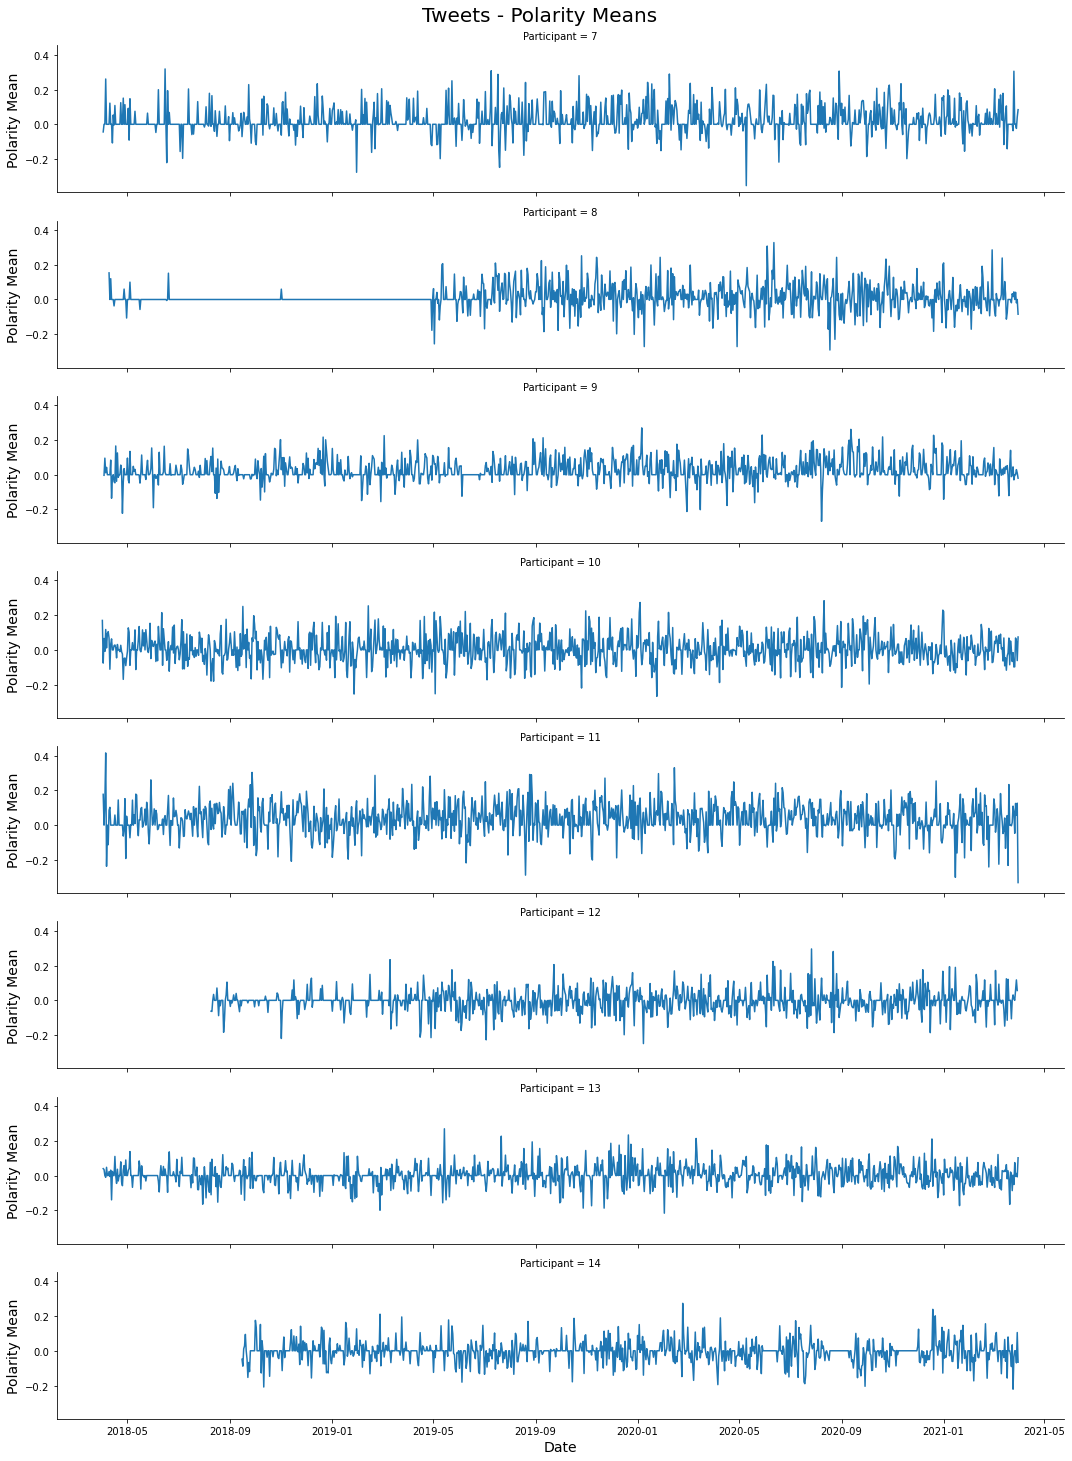

In [239]:
g = sns.FacetGrid(mean_df.query('Participant > 6'), row="Participant")
g.fig.set_size_inches(15,20)
g.map(sns.lineplot, 'date', "final_score")

g.fig.suptitle('Tweets - Polarity Means', fontsize=20, y=1.01)
g.set_axis_labels("Date", 'Polarity Mean', fontsize=14)
        
for ax in g.axes:
    for a in ax:
        a.set_ylabel("Polarity Mean", fontsize=14)
        a.set_xlabel("Date", fontsize=14)

In [240]:
all_tweets['final_score'].describe()

count    62627.000000
mean         0.043047
std          0.216740
min         -0.851526
25%         -0.081550
50%          0.017050
75%          0.184875
max          0.768890
Name: final_score, dtype: float64

[Text(0, 1, '')]

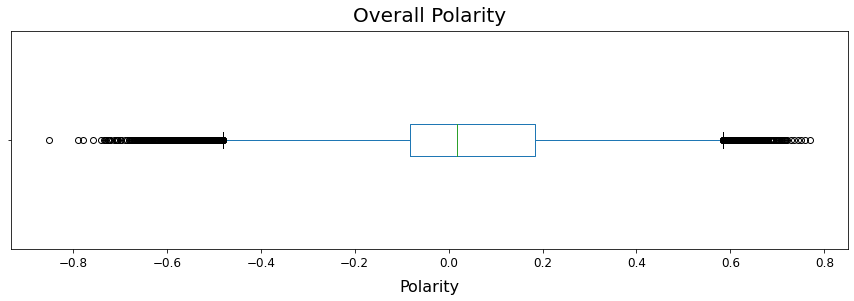

In [241]:
bplot = all_tweets.boxplot(column=['final_score'], grid=False, figsize=(15,4), vert=False)
# y_range = range(0,4501, 500)

bplot.axes.set_title("Overall Polarity", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
# bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_yticklabels([''])

In [242]:
count = 1
bf_df = pd.DataFrame()

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'id_user']
        b['Participant'] = 'P{}'.format(count)
        del b['id']
        del b['id_user']
        b = b[['Participant', 'O', 'C', 'E', 'A', 'N']]
        if bf_df.empty:
            bf_df = b
        else:
            bf_df = bf_df.append(b)
        count +=1

df1 = create_boxplot_chart_data(False)
df2 = create_boxplot_chart_data(True)
df = df1.merge(df2)
df = df.merge(bf_df)
df

,Participant,pos,neu,neg,por_pos,por_neu,por_neg,O,C,E,A,N
0,P1,1991,736,2311,39.519651,14.608972,45.871378,37,43,36,24,26
1,P2,2009,717,1822,44.173263,15.765172,40.061566,41,43,34,22,23
2,P3,2774,598,2560,46.763318,10.080917,43.155765,43,46,31,24,15
3,P4,2016,338,817,63.576159,10.659098,25.764743,17,33,33,22,39
4,P5,3342,467,2184,55.765059,7.792424,36.442516,22,33,31,20,8
5,P6,5575,770,3040,59.403303,8.204582,32.392115,39,49,39,28,15
6,P7,890,159,496,57.605178,10.291262,32.103560,35,35,32,26,16
7,P8,1170,478,947,45.086705,18.420039,36.493256,29,45,34,35,29
8,P9,4284,650,1522,66.356877,10.068154,23.574969,40,46,38,22,21
9,P10,2369,313,2026,50.318607,6.648258,43.033135,32,46,19,18,28


In [243]:
df.rcorr(method='spearman', upper='pval', decimals=3, padjust=None, stars=False)

,pos,neu,neg,por_pos,por_neu,por_neg,O,C,E,A,N
pos,-,0.626,0.007,0.012,0.000,0.436,0.39,0.258,0.411,0.209,0.157
neu,0.143,-,0.088,0.281,0.35,0.533,0.077,0.164,0.156,0.527,0.577
neg,0.688,0.473,-,0.994,0.064,0.081,0.147,0.117,0.535,0.275,0.216
por_pos,0.648,-0.31,-0.002,-,0.005,0.002,0.970,0.892,0.275,0.622,0.421
por_neu,-0.807,0.27,-0.508,-0.705,-,0.474,0.625,0.611,0.881,0.071,0.101
por_neg,-0.226,0.182,0.481,-0.749,0.209,-,0.603,0.493,0.398,0.611,0.516
O,0.249,0.488,0.408,-0.011,-0.143,0.152,-,0.010,0.152,0.609,0.092
C,0.324,0.393,0.438,-0.04,-0.149,0.2,0.658,-,0.369,0.583,0.605
E,0.239,0.4,0.181,0.314,-0.044,-0.245,0.404,0.26,-,0.512,0.580
A,-0.358,0.185,-0.314,-0.145,0.496,-0.149,0.15,0.161,0.191,-,0.64


Text(0.5, 1.0, 'Correlation matrix')

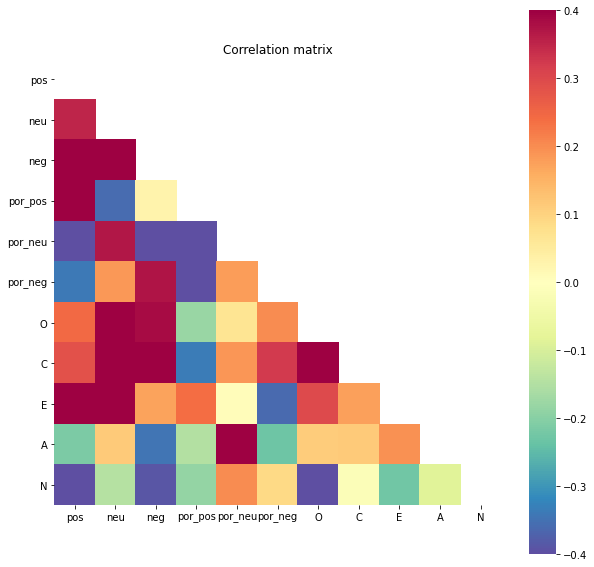

In [244]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [245]:
# Test equality of variance
pg.homoscedasticity(df[['pos', 'neg', 'O', 'C', 'E', 'A', 'N']])

,W,pval,equal_var
levene,0.463553,0.938831,True


In [246]:
all_tweets

,created_at,id_user,final_score,final_polarity,Participant
0,2021-03-31T19:13:28,26,-0.114700,neg,1
1,2021-03-31T12:28:56,26,0.000000,neu,1
2,2021-03-31T12:17:06,26,0.308058,pos,1
3,2021-03-31T11:46:04,26,-0.103292,neg,1
4,2021-03-30T17:58:24,26,-0.232700,neg,1
...,...,...,...,...,...
2693,2019-07-18T12:25:38,42,-0.062500,neg,14
2694,2019-07-14T22:31:40,42,0.204550,pos,14
2695,2019-07-17T18:58:07,42,-0.132075,neg,14
2696,2019-07-18T12:26:04,42,0.033050,pos,14


In [247]:
# Test equality of variance
pg.homoscedasticity(all_tweets[['final_score', 'final_polarity', 'Participant']])

,W,pval,equal_var
levene,4.703624e+31,0.0,False


In [248]:
pg.normality(all_tweets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
id_user,0.927497,0.000000e+00,False
final_score,0.994959,1.861017e-39,False
Participant,0.946802,0.000000e+00,False


Text(0.5, 1.0, 'KDE - All Participants - Tweet Score')

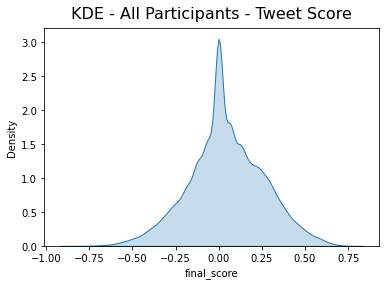

In [249]:
sns.kdeplot(all_tweets['final_score'], fill=True)
plt.title("KDE - All Participants - Tweet Score", fontsize=16, pad=10)

Text(0.5, 1.0, 'Histogram - All Participants - Tweet Score')

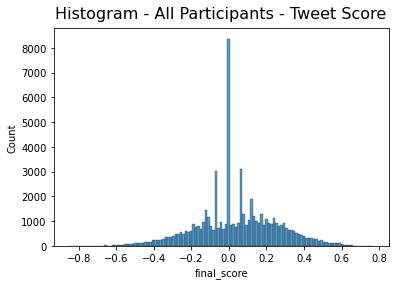

In [250]:
sns.histplot(all_tweets['final_score'])
plt.title("Histogram - All Participants - Tweet Score", fontsize=16, pad=10)

Text(0.5, 1.0, 'QQPlot - All Participants - Tweet Score')

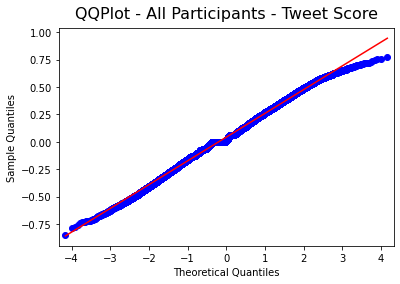

In [251]:
fig = qqplot(all_tweets['final_score'], line='s')
plt.title("QQPlot - All Participants - Tweet Score", fontsize=16, pad=10)

In [252]:
# normality test
stat, p = shapiro(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [253]:
# normality test
stat, p = normaltest(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=59.573, p=0.000
Sample does not look Gaussian (reject H0)


In [254]:
# normality test
result = anderson(all_tweets['final_score'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 158.432
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [255]:
statistic,pvalue = chisquare(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=68341.599, p=0.000
Probably not Gaussian


In [256]:
statistic,pvalue = kstest(all_tweets['final_score'], 'norm')
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=0.324, p=0.000
Probably not Gaussian


In [257]:
statistic,pvalue = jarque_bera(all_tweets['final_score'])
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=68.140, p=0.000
Probably not Gaussian


In [258]:
indices = range(1,13)
for i in indices: 
    statistic,pvalue = jarque_bera(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
    if pvalue > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Statistics=11.853, p=0.003
Probably not Gaussian
Statistics=64.864, p=0.000
Probably not Gaussian
Statistics=6.402, p=0.041
Probably not Gaussian
Statistics=6.312, p=0.043
Probably not Gaussian
Statistics=1.794, p=0.408
Probably Gaussian
Statistics=19.400, p=0.000
Probably not Gaussian
Statistics=0.645, p=0.724
Probably Gaussian
Statistics=50.489, p=0.000
Probably not Gaussian
Statistics=92.167, p=0.000
Probably not Gaussian
Statistics=14.664, p=0.001
Probably not Gaussian
Statistics=2.168, p=0.338
Probably Gaussian
Statistics=130.149, p=0.000
Probably not Gaussian


In [259]:
indices = range(1,13)
for i in indices: 
    statistic,pvalue = kstest(all_tweets.query("Participant == {}".format(i))['final_score'], 'norm')
    print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
    if pvalue > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Statistics=0.317, p=0.000
Probably not Gaussian
Statistics=0.338, p=0.000
Probably not Gaussian
Statistics=0.299, p=0.000
Probably not Gaussian
Statistics=0.351, p=0.000
Probably not Gaussian
Statistics=0.332, p=0.000
Probably not Gaussian
Statistics=0.331, p=0.000
Probably not Gaussian
Statistics=0.339, p=0.000
Probably not Gaussian
Statistics=0.333, p=0.000
Probably not Gaussian
Statistics=0.353, p=0.000
Probably not Gaussian
Statistics=0.302, p=0.000
Probably not Gaussian
Statistics=0.333, p=0.000
Probably not Gaussian
Statistics=0.345, p=0.000
Probably not Gaussian


In [260]:
indices = range(1,13)
for i in indices: 
    statistic,pvalue = chisquare(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))
    if pvalue > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Statistics=-22938.465, p=1.000
Probably Gaussian
Statistics=12767.448, p=0.000
Probably not Gaussian
Statistics=32212.353, p=0.000
Probably not Gaussian
Statistics=1378.231, p=1.000
Probably Gaussian
Statistics=5333.302, p=1.000
Probably Gaussian
Statistics=6121.780, p=1.000
Probably Gaussian
Statistics=1002.745, p=1.000
Probably Gaussian
Statistics=3195.713, p=0.000
Probably not Gaussian
Statistics=2588.296, p=1.000
Probably Gaussian
Statistics=17152.885, p=0.000
Probably not Gaussian
Statistics=2455.624, p=1.000
Probably Gaussian
Statistics=-32182.978, p=1.000
Probably Gaussian


In [261]:
# normality test
indices = range(1,13)
for i in indices: 
    result = anderson(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 19.077
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistic: 23.562
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistic: 11.171
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Statistic: 6.621
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look norm

In [262]:
indices = range(1,13)
for i in indices: 
    # normality test
    stat, p = shapiro(all_tweets.query("Participant == {}".format(i))['final_score'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.989, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)


In [263]:
indices = range(1,13)
for i in indices: 
    print(pg.normality(all_tweets.query("Participant == {}".format(i))['final_score']))

                    W          pval  normal
final_score  0.992997  4.904860e-15   False
                    W          pval  normal
final_score  0.989396  5.461497e-18   False
                    W          pval  normal
final_score  0.995799  4.703535e-12   False
                    W          pval  normal
final_score  0.994622  2.172063e-09   False
                    W          pval  normal
final_score  0.996685  2.549908e-10   False
                    W          pval  normal
final_score  0.996936  4.802613e-13   False
                    W      pval  normal
final_score  0.995589  0.000174   False
                    W          pval  normal
final_score  0.982345  1.934308e-17   False
                    W          pval  normal
final_score  0.992803  1.413019e-17   False
                    W          pval  normal
final_score  0.997314  2.121524e-07   False
                    W          pval  normal
final_score  0.995186  4.228411e-10   False
                    W          pval  nor

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
